![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [27]:
# Start your code here!
library(tidyverse, quietly = TRUE)

#__________________________
# Exploratory data analysis
#__________________________

# Load files

men <- read_csv("men_results.csv")
women <- read_csv("women_results.csv")

str(men)
head(men)
summary(men)
paste("---------------------------------------------")
str(women)
head(women)
summary(women)

New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [44,353 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:44353] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:44353], format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr [1:44353] "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr [1:44353] "England" "Scotland" "England" "Scotland" ...
 $ home_score: num [1:44353] 0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num [1:44353] 0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr [1:44353] "Friendly" "Friendly" "Friendly" "Friendly" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly
5,1876-03-25,Scotland,Wales,4,0,Friendly


      ...1            date             home_team          away_team        
 Min.   :    0   Min.   :1872-11-30   Length:44353       Length:44353      
 1st Qu.:11088   1st Qu.:1979-05-13   Class :character   Class :character  
 Median :22176   Median :1999-03-11   Mode  :character   Mode  :character  
 Mean   :22176   Mean   :1992-06-23                                        
 3rd Qu.:33264   3rd Qu.:2011-03-25                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:44353      
 1st Qu.: 1.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 1.741   Mean   : 1.179                     
 3rd Qu.: 2.000   3rd Qu.: 2.000                     
 Max.   :31.000   Max.   :21.000                     

[1] "---------------------------------------------"

spc_tbl_ [4,884 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:4884] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:4884], format: "1969-11-01" "1969-11-01" ...
 $ home_team : chr [1:4884] "Italy" "Denmark" "England" "Italy" ...
 $ away_team : chr [1:4884] "France" "England" "France" "Denmark" ...
 $ home_score: num [1:4884] 1 4 2 3 3 0 3 3 3 0 ...
 $ away_score: num [1:4884] 0 3 0 1 2 2 0 0 0 2 ...
 $ tournament: chr [1:4884] "Euro" "Euro" "Euro" "Euro" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


...1,date,home_team,away_team,home_score,away_score,tournament
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship
5,1975-08-25,Hong Kong,New Zealand,0,2,AFC Championship


      ...1           date             home_team          away_team        
 Min.   :   0   Min.   :1969-11-01   Length:4884        Length:4884       
 1st Qu.:1221   1st Qu.:2000-06-23   Class :character   Class :character  
 Median :2442   Median :2009-07-13   Mode  :character   Mode  :character  
 Mean   :2442   Mean   :2007-08-17                                        
 3rd Qu.:3662   3rd Qu.:2016-04-12                                        
 Max.   :4883   Max.   :2022-07-31                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:4884       
 1st Qu.: 0.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 2.273   Mean   : 1.431                     
 3rd Qu.: 3.000   3rd Qu.: 2.000                     
 Max.   :24.000   Max.   :24.000                     

In [28]:
# Look at unique values in the columns naming teams and types of tournaments.
# We might find some problems.
# Men first:

for (col in names(men[,c(3,4,7)])) {
  unique_values <- unique(men[[col]])
  print(paste("Unique values in column", col, ":"))
  print(unique_values)
  print("-----------------------------")
}

[1] "Unique values in column home_team :"
  [1] "Scotland"                         "England"                         
  [3] "Wales"                            "Northern Ireland"                
  [5] "United States"                    "Uruguay"                         
  [7] "Austria"                          "Hungary"                         
  [9] "Argentina"                        "Belgium"                         
 [11] "France"                           "Netherlands"                     
 [13] "Czechoslovakia"                   "Switzerland"                     
 [15] "Sweden"                           "Germany"                         
 [17] "Italy"                            "Chile"                           
 [19] "Norway"                           "Finland"                         
 [21] "Luxembourg"                       "Russia"                          
 [23] "Denmark"                          "Catalonia"                       
 [25] "Basque Country"                   "Braz

In [29]:
# Women next:

for (col in names(women[,c(3,4,7)])) {
  unique_values <- unique(men[[col]])
  print(paste("Unique values in column", col, ":"))
  print(unique_values)
  print("-----------------------------")
}

[1] "Unique values in column home_team :"
  [1] "Scotland"                         "England"                         
  [3] "Wales"                            "Northern Ireland"                
  [5] "United States"                    "Uruguay"                         
  [7] "Austria"                          "Hungary"                         
  [9] "Argentina"                        "Belgium"                         
 [11] "France"                           "Netherlands"                     
 [13] "Czechoslovakia"                   "Switzerland"                     
 [15] "Sweden"                           "Germany"                         
 [17] "Italy"                            "Chile"                           
 [19] "Norway"                           "Finland"                         
 [21] "Luxembourg"                       "Russia"                          
 [23] "Denmark"                          "Catalonia"                       
 [25] "Basque Country"                   "Braz

In [30]:
# There do not seem to be any immediate problems.
# There are 311 teams in home, 306 teams in each dataset for away.
# There are 141 tournament names.
# the men dataset has more than 10x the rows of women due to starting in the 1800's.

#__________________________
# Filter
#__________________________

men_filtered <- men %>% 
filter(tournament == "FIFA World Cup",
	date > "2002-01-01")

women_filtered <- women %>% 
filter(tournament == "FIFA World Cup",
	   date > "2002-01-01")

str(men_filtered)
paste("-----------------------------")
str(women_filtered)

spc_tbl_ [384 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:384] 25164 25165 25166 25167 25168 ...
 $ date      : Date[1:384], format: "2002-05-31" "2002-06-01" ...
 $ home_team : chr [1:384] "France" "Germany" "Republic of Ireland" "Uruguay" ...
 $ away_team : chr [1:384] "Senegal" "Saudi Arabia" "Cameroon" "Denmark" ...
 $ home_score: num [1:384] 0 8 1 1 1 1 2 3 2 0 ...
 $ away_score: num [1:384] 1 0 1 2 0 1 2 1 1 1 ...
 $ tournament: chr [1:384] "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] "-----------------------------"

spc_tbl_ [200 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:200] 1600 1601 1602 1603 1604 ...
 $ date      : Date[1:200], format: "2003-09-20" "2003-09-20" ...
 $ home_team : chr [1:200] "Nigeria" "Norway" "Germany" "Japan" ...
 $ away_team : chr [1:200] "North Korea" "France" "Canada" "Argentina" ...
 $ home_score: num [1:200] 0 2 4 6 3 3 1 1 1 1 ...
 $ away_score: num [1:200] 3 0 1 0 1 0 2 0 4 0 ...
 $ tournament: chr [1:200] "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" "FIFA World Cup" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


In [31]:
#__________________________
# Create the new variable
# for hypothesis testing
#__________________________

men_calc <- men_filtered %>% 
mutate(goals_scored = home_score + away_score)

summary(men_calc)

paste("--------------------------------------------------")

women_calc <- women_filtered %>% 
mutate(goals_scored = home_score + away_score)

summary(women_calc)

      ...1            date             home_team          away_team        
 Min.   :25164   Min.   :2002-05-31   Length:384         Length:384        
 1st Qu.:28770   1st Qu.:2006-06-19   Class :character   Class :character  
 Median :34557   Median :2012-06-26   Mode  :character   Mode  :character  
 Mean   :34630   Mean   :2012-07-16                                        
 3rd Qu.:40385   3rd Qu.:2018-06-24                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score      away_score     tournament         goals_scored  
 Min.   :0.000   Min.   :0.000   Length:384         Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   Class :character   1st Qu.:1.000  
 Median :1.000   Median :1.000   Mode  :character   Median :2.000  
 Mean   :1.375   Mean   :1.138                      Mean   :2.513  
 3rd Qu.:2.000   3rd Qu.:2.000                      3rd Qu.:3.000  
 Max.   :8.000   Max.   :7.000                      Max.   :

[1] "--------------------------------------------------"

      ...1           date             home_team          away_team        
 Min.   :1600   Min.   :2003-09-20   Length:200         Length:200        
 1st Qu.:2156   1st Qu.:2007-09-17   Class :character   Class :character  
 Median :3430   Median :2015-06-07   Mode  :character   Mode  :character  
 Mean   :3094   Mean   :2012-10-01                                        
 3rd Qu.:4418   3rd Qu.:2019-06-08                                        
 Max.   :4469   Max.   :2019-07-07                                        
   home_score       away_score     tournament         goals_scored  
 Min.   : 0.000   Min.   :0.000   Length:200         Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:0.000   Class :character   1st Qu.: 2.00  
 Median : 1.000   Median :1.000   Mode  :character   Median : 3.00  
 Mean   : 1.805   Mean   :1.175                      Mean   : 2.98  
 3rd Qu.: 2.000   3rd Qu.:2.000                      3rd Qu.: 4.00  
 Max.   :13.000   Max.   :7.000                      Max.   :

[1] "The mean of men's goals scored is  2.51302083333333 , and the standard deviation is  1.65254364883781"

[1] "--------------------------------------------------"

[1] "The mean of women's goals scored is  2.98 , and the standard deviation is  2.02238726540104"

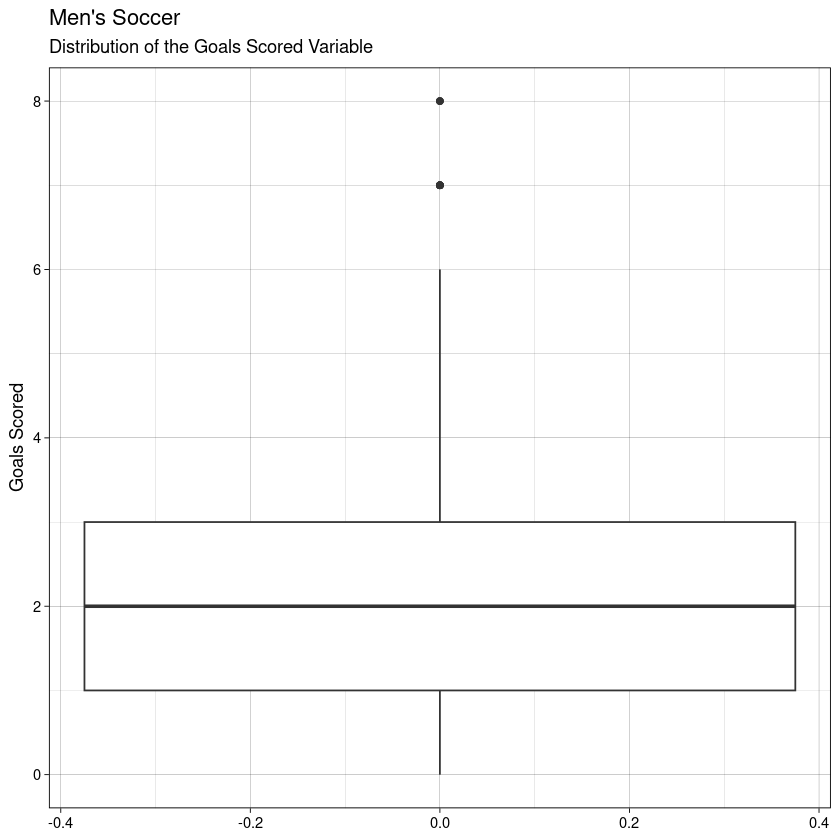

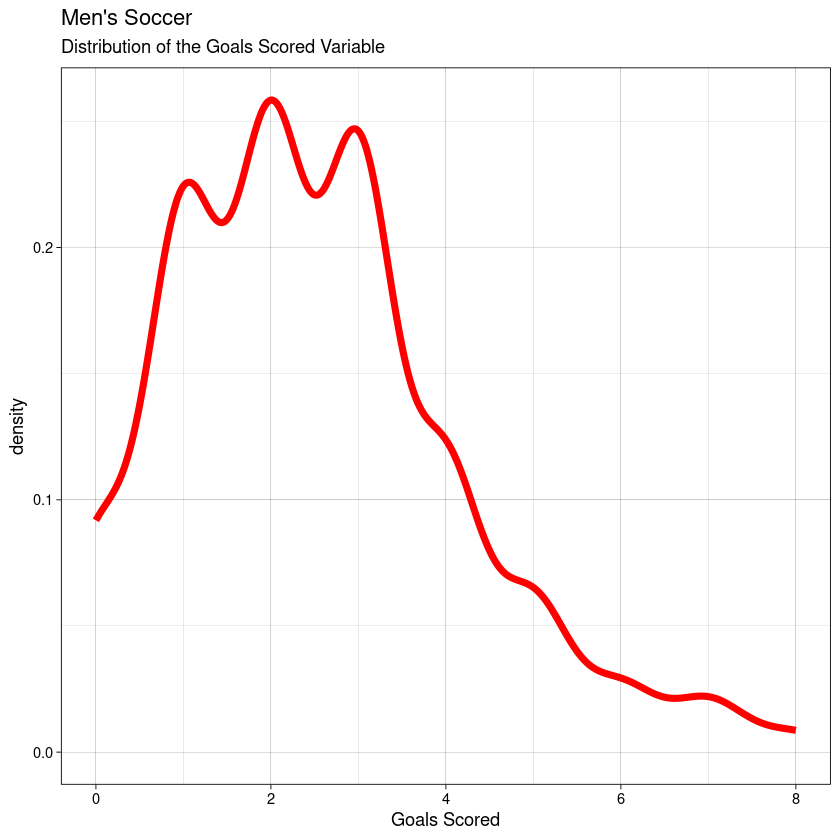

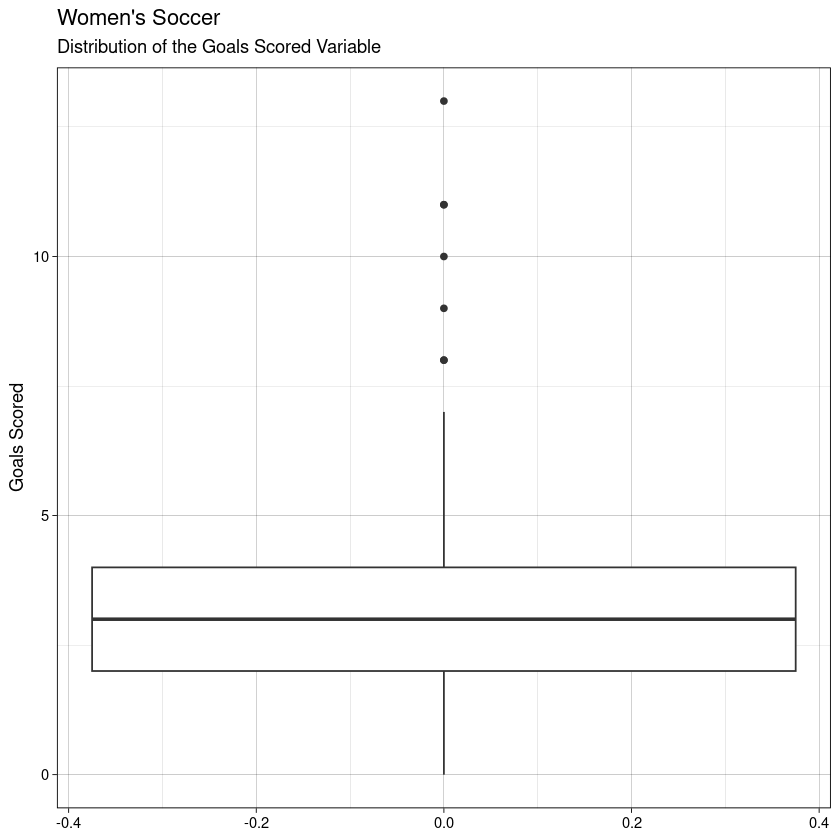

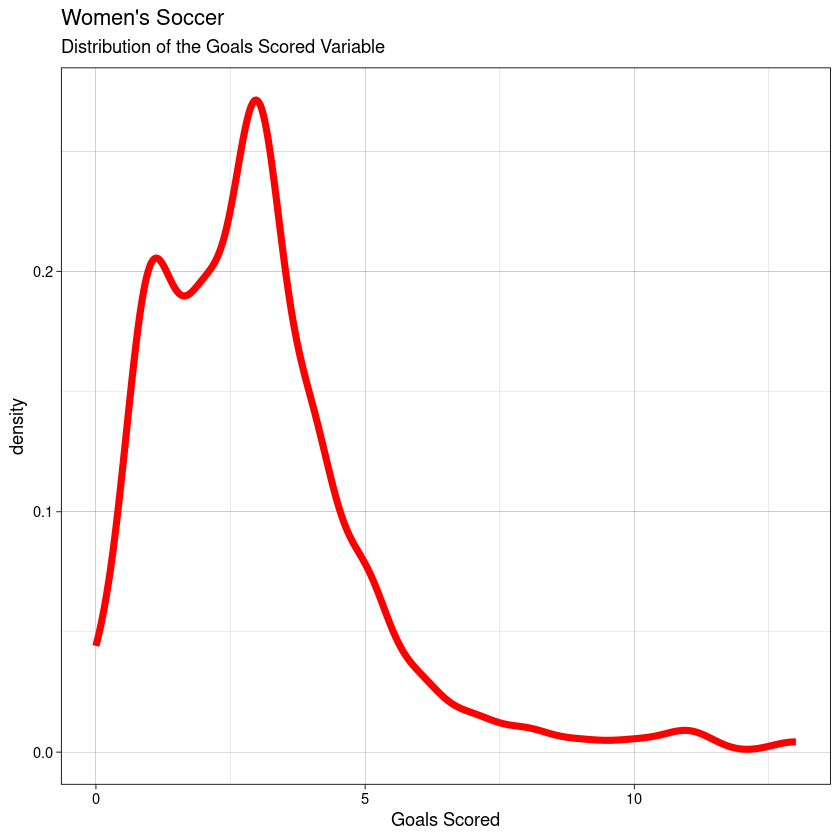

In [32]:
#__________________________
# Choose the correct hypothesis
# test.
#__________________________

# Plot the distribution of the outcome variable we are looking at.
# The goals scored variable in each dataset has strong positive skewness.

paste("The mean of men's goals scored is ", mean(men_calc$goals_scored), ", and the standard deviation is ", sd(men_calc$goals_scored)
	 )

paste("--------------------------------------------------")

paste("The mean of women's goals scored is ", mean(women_calc$goals_scored), ", and the standard deviation is ", sd(women_calc$goals_scored)
	 )

ggplot(men_calc, aes(goals_scored)) + 
geom_boxplot() + 
coord_flip() + 
labs(title = "Men's Soccer",
	subtitle = "Distribution of the Goals Scored Variable",
	 x = "Goals Scored"
	) + 
theme_linedraw()

ggplot(men_calc, aes(goals_scored)) + 
geom_density(color = "red",
			size = 2
			) +  
labs(title = "Men's Soccer",
	subtitle = "Distribution of the Goals Scored Variable",
	 x = "Goals Scored"
	) + 
theme_linedraw()

ggplot(women_calc, aes(goals_scored)) + 
geom_boxplot() + 
coord_flip() + 
labs(title = "Women's Soccer",
	subtitle = "Distribution of the Goals Scored Variable",
	 x = "Goals Scored"
	) + 
theme_linedraw()

ggplot(women_calc, aes(goals_scored)) + 
geom_density(color = "red",
			size = 2
			) +  
labs(title = "Women's Soccer",
	subtitle = "Distribution of the Goals Scored Variable",
	 x = "Goals Scored"
	) + 
theme_linedraw()




In [33]:
# The appropriate test could be the Wilcoxon rank-sum test given that the data are not normally distributed.

test_result <- wilcox.test(women_calc$goals_scored,
					  men_calc$goals_scored, 
					 alternative = "greater"
					 )

p_val <- test_result$p.value
result <- if_else(p_val <= 0.01, "reject", "fail to reject")

result_df <- data.frame(p_val, result)

result_df

p_val,result
<dbl>,<chr>
0.00510661,reject
